In [1]:
%%capture capt
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install chess
!pip install tensorflow
!pip install tensorflow_addons

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from collections import Counter
import time
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import chess

# Load data

In [3]:
%run S3.ipynb

In [4]:
#moves_df = pd.read_csv("../Data/moves_df.csv")
moves_df = open_csv("moves_df.csv")

In [5]:
moves_df

,game_index,moves,evaluation,fen,zobrist_key
0,0,e2e4,35,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,9384546495678726550
1,0,e7e5,48,rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBN...,595762792459712928
2,0,g1f3,111,rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQK...,15213300192948443293
3,0,b8c6,47,r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNB...,8704797333742910878
4,0,f1b5,52,r1bqkbnr/pppp1ppp/2n5/1B2p3/4P3/5N2/PPPP1PPP/R...,5409798013178080797
...,...,...,...,...,...
9023518,118318,a8c8,-6,2rq1rk1/pp2bppp/2n1pn2/3p4/8/P1NP1BP1/1P1BPP1P...,13935396515866781493
9023519,118318,f3g2,-2,2rq1rk1/pp2bppp/2n1pn2/3p4/8/P1NP2P1/1P1BPPBP/...,18028698229637126573
9023520,118318,a7a6,12,2rq1rk1/1p2bppp/p1n1pn2/3p4/8/P1NP2P1/1P1BPPBP...,2937820813377462641
9023521,118318,a1c1,25,2rq1rk1/1p2bppp/p1n1pn2/3p4/8/P1NP2P1/1P1BPPBP...,11978245410268853311


# Analyze y

In [6]:
y = np.array(moves_df.evaluation)

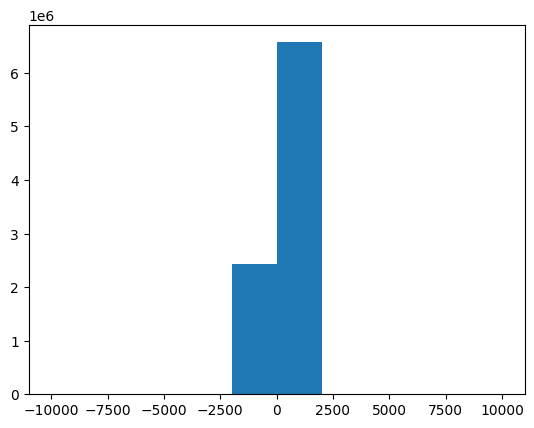

In [7]:
plt.hist(y, bins=10);

## Get number of positions per evaluation range

In [8]:
y.sort()

In [11]:
def get_by_range(y, min_, max_, index=0):
    nb = 0
    for i in range(index, len(y)):
        if min_ <= y[i] and y[i] < max_:
            nb += 1
        if y[i] >= max_:
            return nb, i
    return nb, i

In [20]:
min_y, max_y = np.min(y), np.max(y)

In [32]:
nb_per_range, ranges = [], []
index = 0
min_range, max_range = min_y, min_y+50

nb, index = get_by_range(y, min_range, max_range, index=index)
nb_per_range.append(nb)
ranges.append(range(min_range, max_range))

while index < len(y)-1:
    min_range, max_range = min_range+50, max_range+50
    nb, index = get_by_range(y, min_range, max_range, index=index)
    nb_per_range.append(nb)
    ranges.append(range(min_range, max_range))

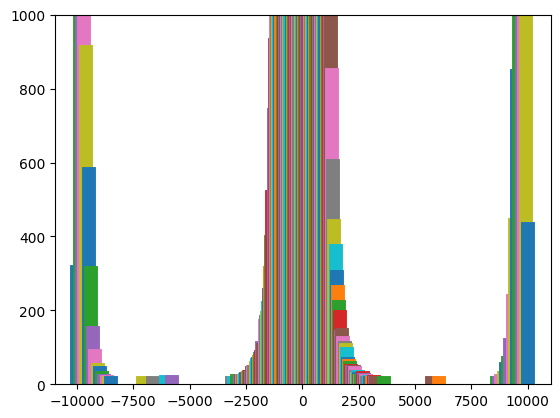

In [45]:
for i in range(len(ranges)):
    plt.plot([np.mean(ranges[i]), np.mean(ranges[i])], [0, nb_per_range[i]], linewidth=10)

plt.ylim([0, 1000])
plt.show()

In [47]:
np.sum([1 if x > 300 else 0 for x in nb_per_range])

73

In [48]:
73*300

21900